<h1 style="text-align:center"> Remoção de Vértices e Arestas </h1>
<p>Teoria da percolação em redes:https://pt.wikipedia.org/wiki/Teoria_da_percola%C3%A7%C3%A3o_em_redes</p>  

<p>Dado uma rede G, com N vértices, é removido uma quantidade R de vértices aletóriamente sem repetir os removidos. <br> São criadas N/R subredes de G</p>
<br>  
Embora o exemplo usado aqui seja muito simples e pequeno, o código pode ser utilizado (e adaptado) para análises mais complexas 
<br>  
  
<p style="font-size:10px; font-weight:bold">Material feito por Rodrigo Henrique Ramos - ramos@ifsp.edu.br</p> 

# Bibliotecas e Inputs

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
import statistics as st
import warnings # Para não mostrar warnings. Deixa o notebook mais limpo
warnings.filterwarnings('ignore')

In [2]:
def plotGraphDegree(nxGraph):
    #Degree retorna o nome do vertice o seu grau como uma tula (V,D). Quero só o D
    #ordeno para facilitar o visualizacao do grafico
    listaDeGraus = sorted([tupla[1] for tupla in list(nxGraph.degree())])
    plt.figure()
    #Acrescento informações estatísticas da rede como título
    info = "Qtde Nos: "+str(len(listaDeGraus))+" | Grau Médio e Mediana: "+str(round(st.mean(listaDeGraus),2))+" | "+str(st.median(listaDeGraus))
    plt.title(info)
    plt.xlabel("Number of Nodes")
    plt.ylabel("Degree")
    plt.plot(listaDeGraus,'o')
    plt.tight_layout()
    plt.show()

In [3]:
def plotGraph(nxGraph,name):
    plt.figure()
    plt.title(name)
    nx.draw_kamada_kawai(nxGraph,with_labels=True)
    plt.show()

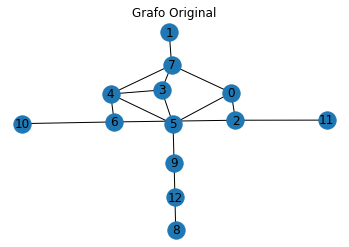

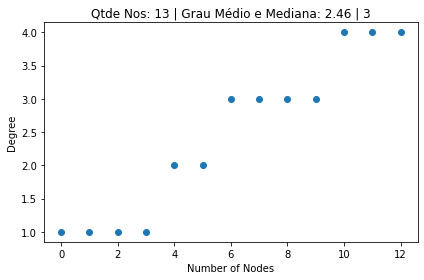

In [4]:
#============GRAFO ORIGINAL=========

#Crio um grafo pré definido do networkx
G = nx.sedgewick_maze_graph()
#Add mais arestas para que fique em um formato legal de visualizar
G.add_edge(3,7)
G.add_edge(5,9)
G.add_edge(6,10)
G.add_edge(2,11)
G.add_edge(8,12)
G.add_edge(9,12)
#Plot do Grafo
plotGraph(G,"Grafo Original")

#Plot informações de grau
plotGraphDegree(G)

# Processo de Remoção de Vértices

In [5]:
#========= CRIAÇÃO DA LISTA ALEATÓRIA =====

#Pego uma lista com todos vértices 
verticesRedeOriginal = list(G.nodes())
print("Ordem original dos vertices ", verticesRedeOriginal)
verticesEmbaralhados = list(G.nodes())
#Embaralho os vértices
rd.shuffle(verticesEmbaralhados) #Cada vez que executar essa célula vai gerar uma ordem difente. Por isso é legal executar ela uma vez só e fazer os resto do código em outra célula
print("Ordem embaralhada dos vertices ", verticesEmbaralhados)

Ordem original dos vertices  [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 8, 12]
Ordem embaralhada dos vertices  [1, 4, 12, 11, 10, 9, 8, 3, 5, 0, 7, 2, 6]


Nos removidos nessa iteracao:  [1, 4, 12]


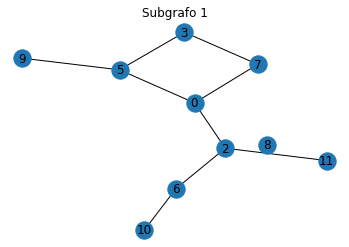

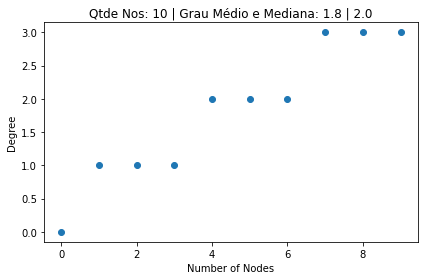


_______________________________________________________

Nos removidos nessa iteracao:  [11, 10, 9]


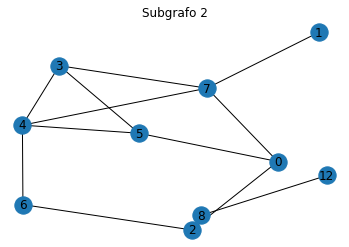

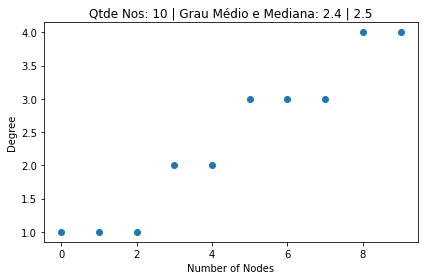


_______________________________________________________

Nos removidos nessa iteracao:  [8, 3, 5]


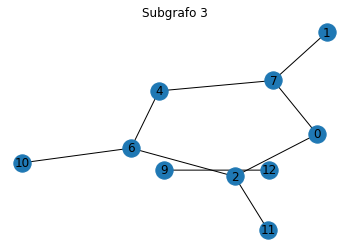

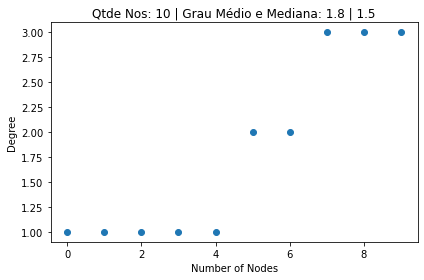


_______________________________________________________

Nos removidos nessa iteracao:  [0, 7, 2]


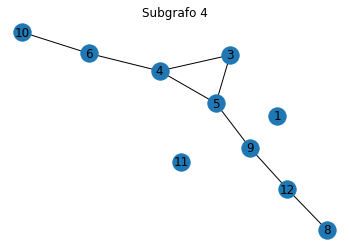

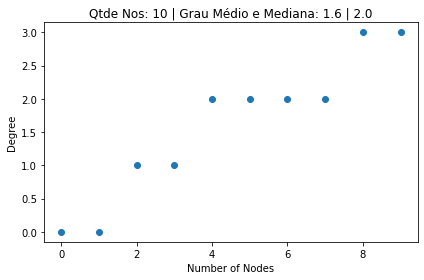


_______________________________________________________

Nos removidos nessa iteracao:  [6, 1, 4]


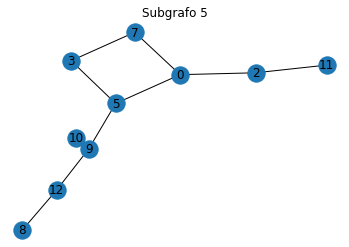

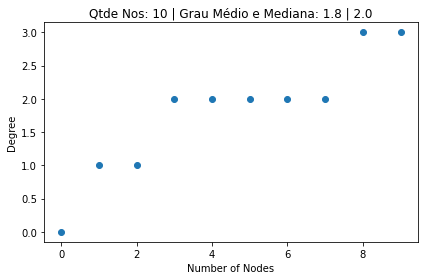

In [6]:
#========= REMOÇÃO DE NOS

#O algoritmo é
# 1- Decidir qtos nos quero tirar (removeN)
# 2- Percorrer a lista "verticesEmbaralhados"
# 3- Em cada iteração, crio uma cópia do grafo original e dessa cópia eu removo "removeN" elementos considerando a ordem de "verticesEmbaralhados"
# 4- Dependendo de tamanho da remoção, pode ser que tenha que dar a volta a lista

removeN = 3 # Vou remover numero fixo pq a rede é pqna, mas o ideal seria remover um percentual tipo: len(verticesEmbaralhados)*0.10
nodesToRemove = []
subGraphNumber=1
subGraphs=[]
for i in range (0,len(verticesEmbaralhados)):
    if(len(nodesToRemove) == removeN ):
        #========Aqui que faço tudo que preciso
        
        print("Nos removidos nessa iteracao: ",nodesToRemove)
        #Crio uma cópia do grafo original
        auxGraph = G.copy()
        #remove os vertices do grafo copia
        [auxGraph.remove_node(n) for n in nodesToRemove]
        #plot info 
        plotGraph(auxGraph,"Subgrafo "+str(subGraphNumber))
        plotGraphDegree(auxGraph)
        subGraphNumber+=1
        nodesToRemove = []
        #Imprime uma linha para facilitar a visualização
        print("\n_______________________________________________________\n")
        nodesToRemove.append(verticesEmbaralhados[i])
        subGraphs.append(auxGraph)
    else:
        nodesToRemove.append(verticesEmbaralhados[i])
        
#No exemplo, o grafo tem 13 vertice e estou removend de 3 em 3. Com isso fica 1 sem remover. Vou 'dar a volta' a lista até para completar que precis
cont=0
while(len(nodesToRemove) < removeN):
    nodesToRemove.append(verticesEmbaralhados[cont])
    cont+=1
    

#Pela última vez
print("Nos removidos nessa iteracao: ",nodesToRemove)
#Crio uma cópia do grafo original
auxGraph = G.copy()
#remove os vertices do grafo copia
[auxGraph.remove_node(n) for n in nodesToRemove]
subGraphs.append(auxGraph)
#plot info 
plotGraph(auxGraph,"Subgrafo "+str(subGraphNumber))
plotGraphDegree(auxGraph)

# Analises das subredes

In [7]:
print("Qtde de vértices em G: ",len(G.nodes))
print("Qtde de vértices removidos em cada interação: ", str(removeN))
print("Qtde de subredes esperada: ",len(G.nodes)/removeN)
print("Qtde de subredes geradas: ",len(subGraphs))

Qtde de vértices em G:  13
Qtde de vértices removidos em cada interação:  3
Qtde de subredes esperada:  4.333333333333333
Qtde de subredes geradas:  5


In [8]:
medidas={}
cont=1
for sub in subGraphs:
    graus = dict(sub.degree).values()
    medidas['subRede'+str(cont)]={}    
    medidas['subRede'+str(cont)]['GrauMenor']=min(graus)
    medidas['subRede'+str(cont)]['GrauMaior']=max(graus)
    medidas['subRede'+str(cont)]['GrauMedio']=st.mean(graus)
    medidas['subRede'+str(cont)]['GrauMediana']=st.median(graus)
    medidas['subRede'+str(cont)]['CCs']=len(list(nx.connected_components(sub)))
    LCC = nx.subgraph(G,max(nx.connected_components(sub))) 
    medidas['subRede'+str(cont)]['AvgClusteringLCC']=round(nx.average_clustering(LCC),3)
    medidas['subRede'+str(cont)]['AvgShortestPathsLCC']=round(nx.average_shortest_path_length(LCC),3)
    cont+=1
    
    
medidas_df = pd.DataFrame.from_dict(medidas,orient='index')
medidas_df

,GrauMenor,GrauMaior,GrauMedio,GrauMediana,CCs,AvgClusteringLCC,AvgShortestPathsLCC
subRede1,0,3,1.8,2.0,2,0.000,2.500
subRede2,1,4,2.4,2.5,2,0.188,1.750
subRede3,1,3,1.8,1.5,2,0.000,2.107
subRede4,0,3,1.6,2.0,3,0.000,0.000
subRede5,0,3,1.8,2.0,2,0.000,2.667
